# Chapter 2: Probability Simulator — Exploring Uncertainty with Python

A hands-on exploration of probability theory through simulation and visualization.

This notebook is part of the Mastering Statistics in Python series by Pranav Alok, inspired by *Mathematical Statistics with Applications (7th Edition) by Wackerly et al.*

# 1. Introduction

Probability is the mathematical foundation of all statistical inference.
It describes uncertainty — how likely different outcomes are, given the randomness of the world.

In this notebook, we’ll simulate and visualize core probability concepts such as:

Random experiments (coin flips, dice rolls)

Empirical probability estimation

Conditional probability

Independence of events

Bayes’ theorem (posterior probabilities)

By the end, we’ll see how simulation bridges mathematical theory and real-world intuition — turning abstract formulas into observable outcomes.

# 2. Import Libraries and Setup

Before we begin, we’ll import the essential Python libraries for our probability simulations and visualizations.

random → to generate random events (coin flips, dice rolls)

numpy → for large-scale numerical simulation

matplotlib and seaborn → to visualize distributions and results

matplotlib_venn → to illustrate overlapping events (for conditional probability)

We’ll also apply a simple visual theme for cleaner plots.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6,4)

# 3. Coin Flip Simulation

A fair coin has two possible outcomes — Heads (H) or Tails (T).
Theoretically, the probability of each outcome is:

**𝑃(Heads)=𝑃(Tails)=1/2​**

But in the real world, we often estimate probabilities empirically — by repeating experiments many times and calculating frequencies.

In this section, we:

Simulate flipping a coin thousands of times.

Compute empirical probabilities of Heads and Tails.

Visualize the results as a simple bar chart.

See how results converge to 0.5 as trials increase (Law of Large Numbers).

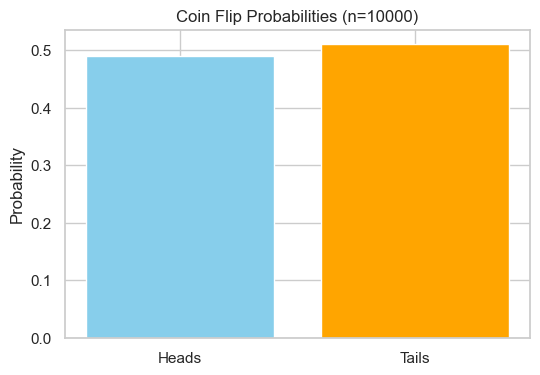

(0.4904, 0.5096)

In [3]:
def simulate_coin_flips(trials=10000):
    outcomes = [random.choice(["Heads", "Tails"]) for _ in range(trials)]
    p_heads = outcomes.count("Heads") / trials
    p_tails = 1 - p_heads
    plt.bar(["Heads", "Tails"], [p_heads, p_tails], color=["skyblue", "orange"])
    plt.title(f"Coin Flip Probabilities (n={trials})")
    plt.ylabel("Probability")
    plt.show()
    return p_heads, p_tails

simulate_coin_flips()

# 4. Two Dice Simulation

Rolling two dice is a classic experiment in probability.
Each die has 6 outcomes, giving **6×6=36** total combinations.

We’ll simulate rolling two dice **10,000** times and record the sum of their outcomes.

This lets us:

Empirically estimate 
P(Sum=7), which theoretically equals **6/36=1/6≈0.1667**

Visualize the distribution of all possible sums (2 through 12)

Compare the shape of the empirical histogram to the theoretical **“bell”** shape of the dice sum distribution.

You’ll notice that the middle values (6, 7, 8) are most likely, forming a triangular distribution — an early glimpse of the Central Limit Theorem in action.

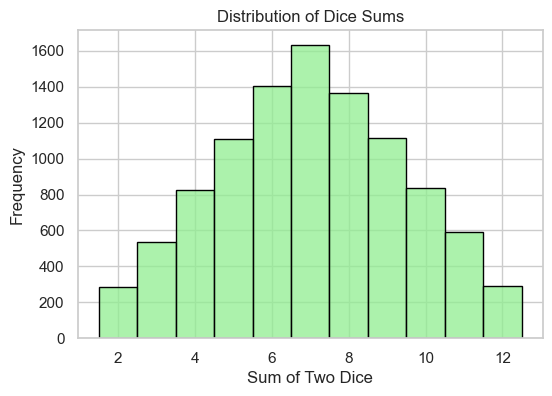

P(Sum = 7) ≈ 0.163 (theoretical = 1/6 = 0.1667)


np.float64(0.1633)

In [4]:
def simulate_dice_rolls(trials=10000):
    sums = np.random.randint(1, 7, size=trials) + np.random.randint(1, 7, size=trials)
    p_sum_7 = np.mean(sums == 7)
    
    sns.histplot(sums, bins=np.arange(2, 14)-0.5, kde=False, color="lightgreen", edgecolor="black")
    plt.title("Distribution of Dice Sums")
    plt.xlabel("Sum of Two Dice")
    plt.ylabel("Frequency")
    plt.show()
    
    print(f"P(Sum = 7) ≈ {p_sum_7:.3f} (theoretical = 1/6 = 0.1667)")
    return p_sum_7

simulate_dice_rolls()

# 5. Conditional Probability

Conditional probability answers the question:

“What is the probability of event A, given that event B has occurred?”

Mathematically:

**P(A∣B)=P(A∩B)/P(B)**​

Here we define two events:

**A: The sum of two dice > 8**, **B: The first die shows an even number**

We’ll simulate both events repeatedly, estimate 

P(A∣B), and visualize the relationship between A and 𝐵 using a Venn diagram.

This helps illustrate how overlapping probabilities form the foundation of conditional reasoning.

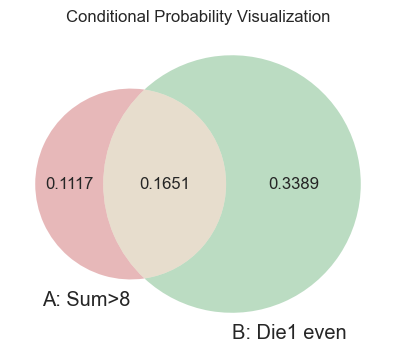

P(A|B) = 0.328


np.float64(0.3275793650793651)

In [5]:
def conditional_probability(trials=10000):
    die1 = np.random.randint(1, 7, trials)
    die2 = np.random.randint(1, 7, trials)
    
    A = die1 + die2 > 8
    B = die1 % 2 == 0
    
    pA = np.mean(A)
    pB = np.mean(B)
    pA_and_B = np.mean(A & B)
    pA_given_B = pA_and_B / pB
    
    venn2(subsets=(pA - pA_and_B, pB - pA_and_B, pA_and_B),
          set_labels=("A: Sum>8", "B: Die1 even"))
    plt.title("Conditional Probability Visualization")
    plt.show()
    
    print(f"P(A|B) = {pA_given_B:.3f}")
    return pA_given_B

conditional_probability()


# 6. Independence Check

Two events are independent if the occurrence of one does not affect the probability of the other.

Formally:

**P(A∩B)=P(A)×P(B)**

Using our dice experiment:

A: Sum of dice > 8
B: First die even

We’ll empirically estimate all three probabilities — 

P(A),P(B),P(A∩B) — and check if the product 

P(A)*P(B) is approximately equal to P(A∩B).

When they’re close, we can consider the events independent in the long run.

In [6]:
die1 = np.random.randint(1, 7, 100000)
die2 = np.random.randint(1, 7, 100000)
A = die1 + die2 > 8
B = die1 % 2 == 0

pA = np.mean(A)
pB = np.mean(B)
pA_and_B = np.mean(A & B)

print(f"P(A)={pA:.3f}, P(B)={pB:.3f}, P(A∩B)={pA_and_B:.3f}")
print(f"P(A)*P(B)={pA*pB:.3f}")


P(A)=0.279, P(B)=0.497, P(A∩B)=0.166
P(A)*P(B)=0.139


# 7. Bayes’ Theorem Simulation

Bayes’ theorem is one of the most powerful ideas in probability — it allows us to update beliefs when new evidence appears.

Formula:
**P(H∣E)=P(E∣H)*P(H)/P(E∣¬H)P(¬H) + P(E∣H)P(H)**

We’ll simulate a medical testing scenario:

*P(Disease)=0.01 (1% prevalence)*

*P(Positive∣Disease)=0.99 (99% sensitivity)*

*P(Positive∣No Disease)=0.05 (5% false positives)*

Then we’ll estimate the posterior probability 
P(Disease∣Positive) using simulation — showing why even accurate tests can be misleading when diseases are rare.

We’ll also visualize how prior, evidence, and posterior probabilities compare.

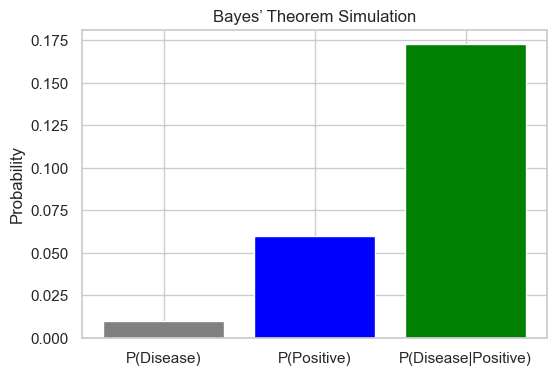

P(Disease|Positive) ≈ 0.172


np.float64(0.17236776238945437)

In [7]:
def bayes_theorem_simulation(population=100000):
    p_disease = 0.01
    sensitivity = 0.99
    false_positive = 0.05

    has_disease = np.random.rand(population) < p_disease
    test_positive = np.where(
        has_disease,
        np.random.rand(population) < sensitivity,
        np.random.rand(population) < false_positive
    )

    p_positive = test_positive.mean()
    p_disease_given_positive = has_disease[test_positive].mean()

    plt.bar(["P(Disease)", "P(Positive)", "P(Disease|Positive)"],
            [p_disease, p_positive, p_disease_given_positive],
            color=["gray", "blue", "green"])
    plt.title("Bayes’ Theorem Simulation")
    plt.ylabel("Probability")
    plt.show()

    print(f"P(Disease|Positive) ≈ {p_disease_given_positive:.3f}")
    return p_disease_given_positive

bayes_theorem_simulation()


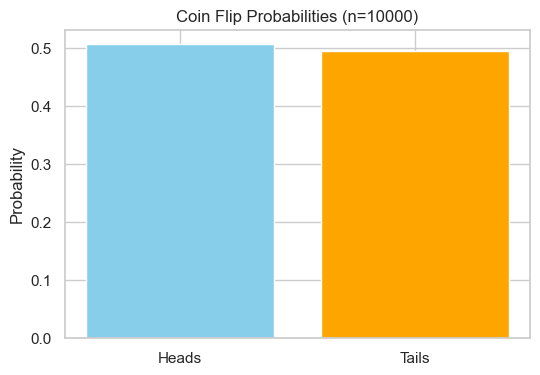

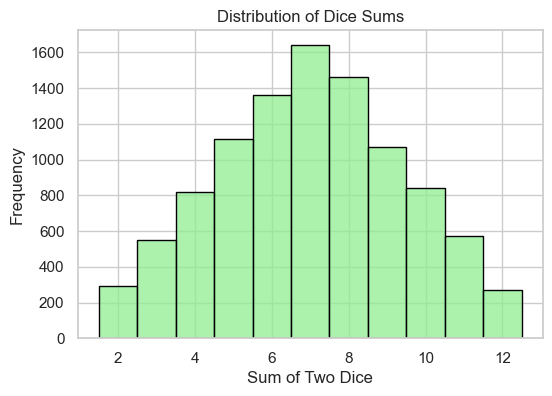

P(Sum = 7) ≈ 0.164 (theoretical = 1/6 = 0.1667)


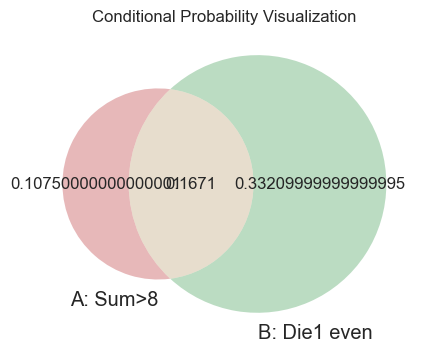

P(A|B) = 0.335


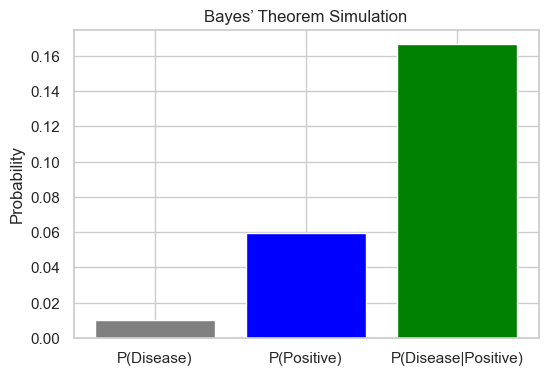

P(Disease|Positive) ≈ 0.166


,Experiment,Result
0,Coin Flip,0.506
1,Dice Sum,0.164
2,Conditional P(A|B),0.335
3,Bayes Posterior,0.166


In [8]:
coin = simulate_coin_flips()
dice = simulate_dice_rolls()
cond = conditional_probability()
bayes = bayes_theorem_simulation()

import pandas as pd
summary = pd.DataFrame({
    "Experiment": ["Coin Flip", "Dice Sum", "Conditional P(A|B)", "Bayes Posterior"],
    "Result": [f"{coin[0]:.3f}", f"{dice:.3f}", f"{cond:.3f}", f"{bayes:.3f}"]
})
summary